Aarón Villegas Kane

1848627

Estadística Aplicada

G51

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [3]:
from lifelines import*

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/aaron-v-kane/Tareas_EstadisticaAplicada_15/main/supervivencia_examenes.csv")

In [19]:
#cambiar datos de columna género de m,f a 1,0
#m = 1; f = 0
df["género"] = np.where(df["género"] == "f", 0, 1)

In [20]:
df.mean()

id                9.000000
tiempo          107.352941
examen            1.000000
calificación     90.705882
género            0.529412
dtype: float64

In [21]:
df.groupby('género').mean()

,id,tiempo,examen,calificación
género,,,,
0,8.750000,108.125000,1.0,93.000000
1,9.222222,106.666667,1.0,88.666667


Los alumnos respondieron, en promedio, más rápido el examen, sin embargo, las alumnas obtuvieron mejor calificación.

In [8]:
from lifelines import KaplanMeierFitter

In [9]:
kmf = KaplanMeierFitter()

In [22]:
masc = df[df['género'] == 1]
fem = df[df['género'] == 0]

TM = masc['tiempo']
CM = masc['calificación']
EM = masc['examen']

TF = fem['tiempo']
CF = fem['calificación']
EF = fem['examen']

,df
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


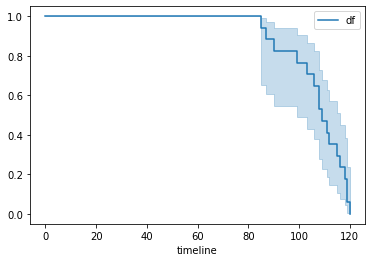

In [24]:
#todos
kmf.fit(df['tiempo'], df['examen'], label = "df").plot()
kmf.survival_function_

In [25]:
kmf.fit(df['tiempo'], df['examen'], label = "df")
kmf.confidence_interval_

,df_lower_0.95,df_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


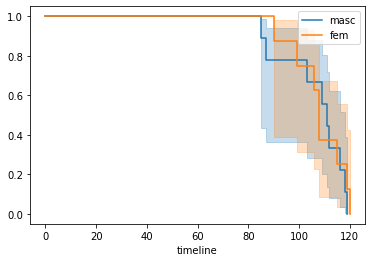

In [26]:
#separado
ax = plt.subplot(111)
ax = kmf.fit(TM, EM, label = "masc").plot(ax=ax)
ax = kmf.fit(TF, EF, label = "fem").plot(ax=ax)

Dado que ambos graficos se entrelazan una cantidad considerable, parece ser que no hay evidencia suficiente como para decire que las alumnas responden más rápido.

In [27]:
from lifelines.statistics import logrank_test

In [28]:
results = logrank_test(TM, TF, event_observed_A = EM, event_observed_B = EF)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

Como p-valor > alfa, no rechazamos H0, por lo que hay evidencia estadística suficiente para decir que las alumnas no contestan más rápido.

In [29]:
from lifelines import CoxPHFitter

In [30]:
cph = CoxPHFitter()
cph.fit(df, duration_col='tiempo', event_col='examen')

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>

In [31]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2022-05-10 01:27:46 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género         0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género           0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

<AxesSubplot:xlabel='log(HR) (95% CI)'>

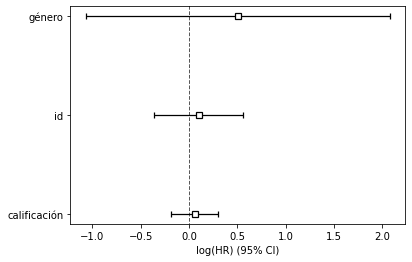

In [32]:
cph.plot()

<AxesSubplot:>

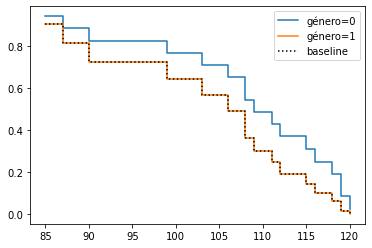

In [33]:
cph.plot_partial_effects_on_outcome(covariates='género',values=[0,1])

Dado que los coeficientes de calificación, así como los de género, tienen p-valor > alfa, no se rechaza H0; de tal manera que estos no son significativos, por lo que podemos decir que ni el género ni la calificación influyen en el evento (entregar el examen).
Tomando en cuenta las funciones de supervivencia con el modelo de Cox, estas no son del todo similares a las de Kaplan-Meier. Las funciones no se entrelazan y aquí indicaría que las mujeres sí terminan más rápido, sin embargo el log rank testy los p-valores de la prueba de Cox indican que no es así.